# Predicting Diabetes using Machine Learning

**Business Problem**: One of the fields where Artificial Intelligence will have a huge positive impact in the future is Medical Science. Doctors and researchers have been trying to use Machine Learning to learn the occurrence of cancers and use the different protein combinations in the DNA as the data to predict the diseases long before it will occur to the person. In the future, we might be able to know our chance of getting a cancer a decade or 2 before that can help us avoid it.

Fortunately, in my search of finding a good medical science dataset, I came across this “**Pima Indians Diabetes Database**” on Kaggle. It is collected from the National Institute of Diabetes and Digestive and Kidney Disease. This dataset is small with 9 features and 768 observations which is enough to solve the problem of predicting the probability of a person to be a Diabetic.

Here’s a brief description of all the features which I’m referring from data source itself for you to follow along.

1: **Pregnancies: Number of times pregnant**

2: **Glucose: Plasma glucose concentration a 2 hours in an oral glucose tolerance test.**

3: **BloodPressure: Diastolic blood pressure (mm Hg)**

4: **SkinThickness: Triceps skin fold thickness (mm)**

5: **Insulin: 2-Hour serum insulin (mu U/ml)**

6: **BMI: Body mass index (weight in kg/(height in m)²)**

7: **DiabetesPedigreeFunction: Diabetes pedigree function**

8: **Age: Age (years)**

9: **Outcome: Class variable (0 or 1) 268 of 768 are 1, the others are 0**

All the variables are either self-known or available in a simple Blood Test and “Outcome” is what we need to predict.

We will explore different features and perform various pre-processing techniques before trying out different machine learning algorithms like logistic Regression, Support Vector Machines, Decision FOrest, Gradient Boosting. Once we have the best model, we will pickle the model and use that to develop a Flask app to predict diabetes and then deploy it using Heroku. Let's begin.

In [1]:
#importing reqd libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("diabetes.csv")

In [3]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


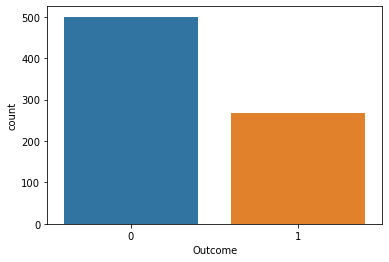

In [4]:
ax = sns.countplot(x="Outcome", data=df)

In [5]:
df['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

In [6]:
df.shape

(768, 9)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [8]:
df.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [9]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [10]:
df.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


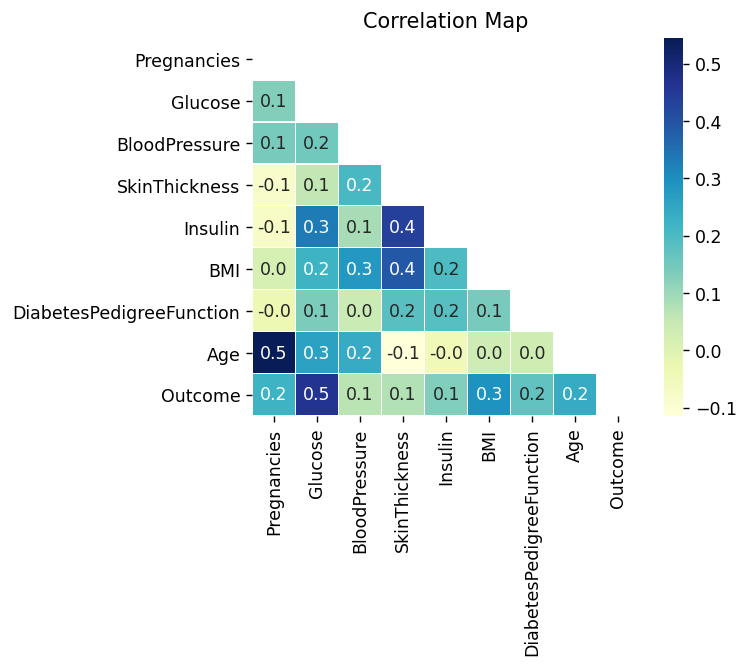

In [11]:
#correlation map without any preprocessing

plt.figure(dpi = 125,figsize= (5,4))
mask = np.triu(df.corr())
sns.heatmap(df.corr(),mask = mask, fmt = ".1f",annot=True,lw=0.1,cmap = 'YlGnBu')
plt.title('Correlation Map')
plt.show()

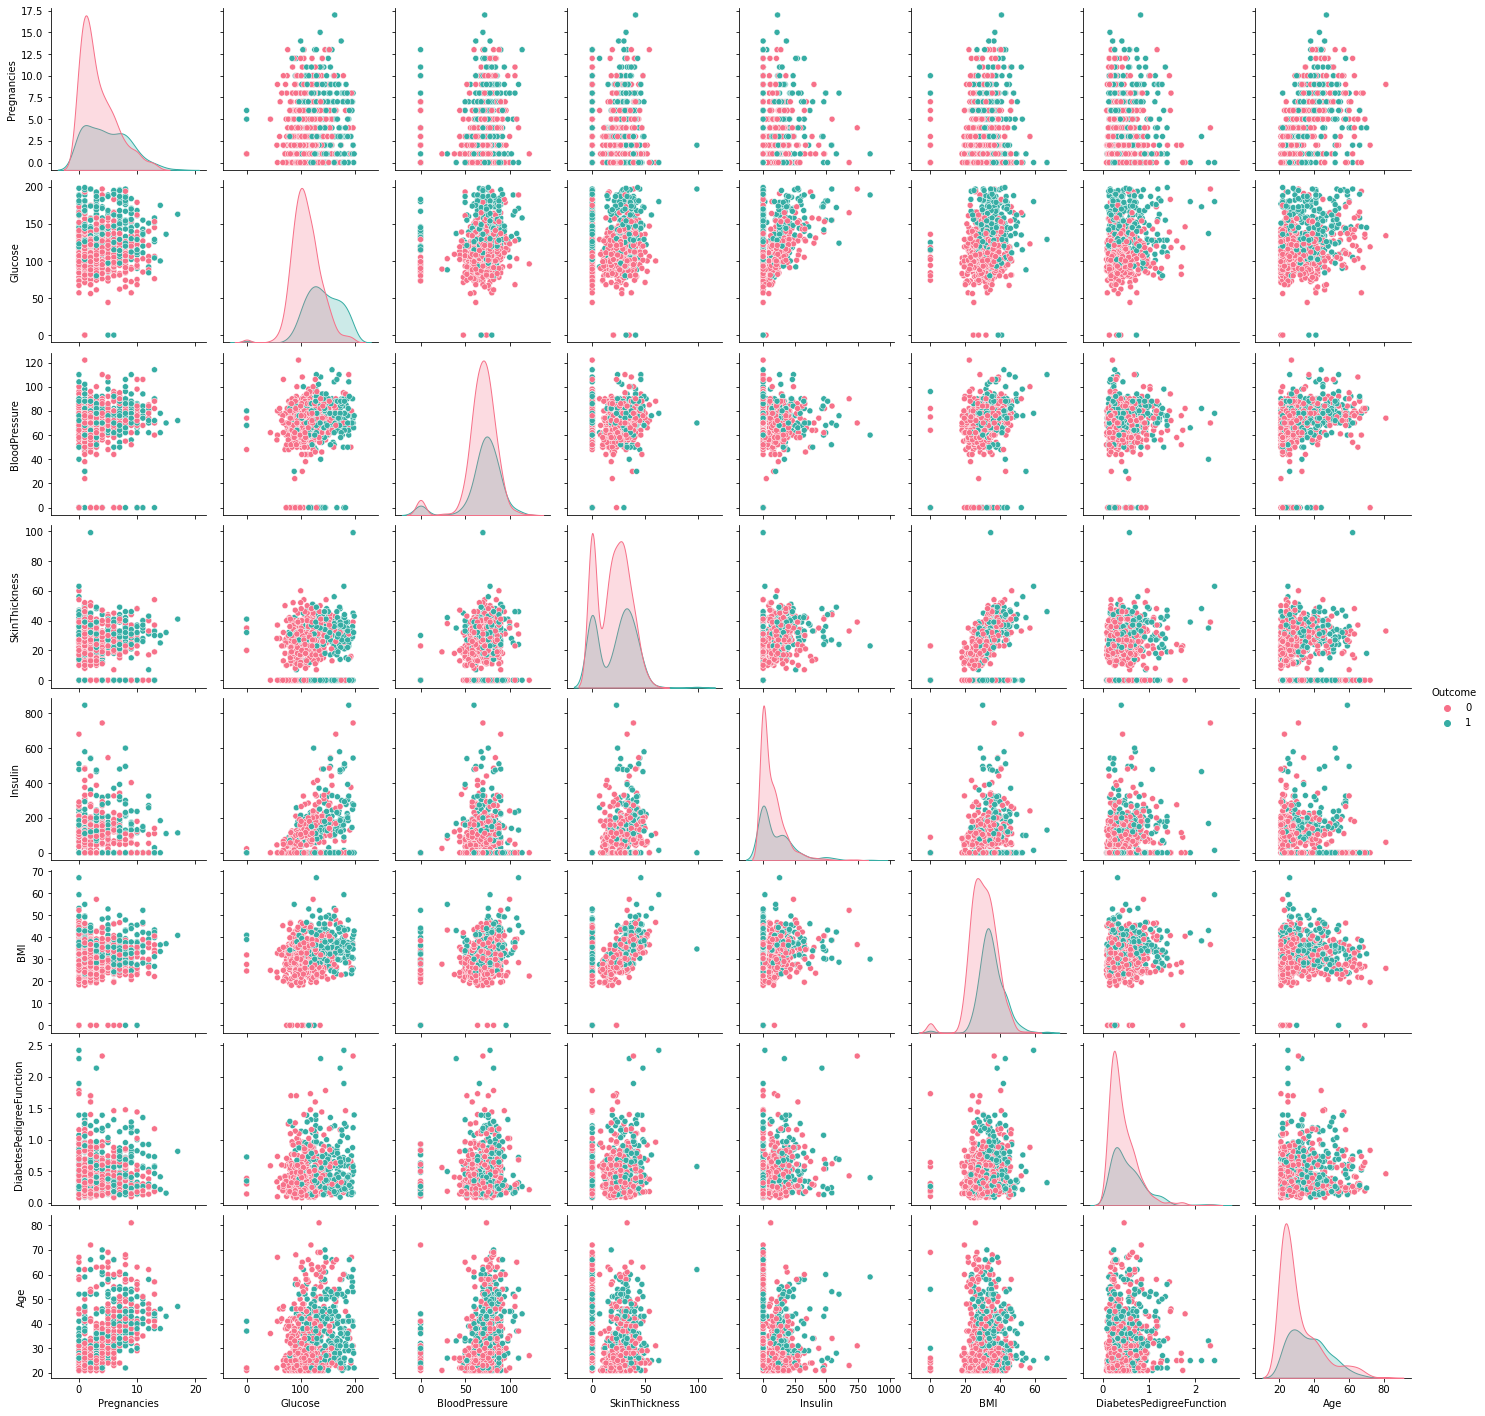

In [12]:
sns.pairplot(df, hue="Outcome", palette="husl")

In [13]:
print('Total zero Glucose values: ' + str(df[df['Glucose']==0].shape[0]))
print('Total zero BloodPressure values: ' + str(df[df['BloodPressure']==0].shape[0]))
print('Total zero SkinThickness values: ' + str(df[df['SkinThickness']==0].shape[0]))
print('Total zero Insulin values: ' + str(df[df['Insulin']==0].shape[0]))
print('Total zero BMI values: ' + str(df[df['BMI']==0].shape[0]))
print('Total zero DiabetesPedigreeFunction values: ' + str(df[df['DiabetesPedigreeFunction']==0].shape[0]))
print('Total zero Age values: ' + str(df[df['Age']==0].shape[0]))

Total zero Glucose values: 5
Total zero BloodPressure values: 35
Total zero SkinThickness values: 227
Total zero Insulin values: 374
Total zero BMI values: 11
Total zero DiabetesPedigreeFunction values: 0
Total zero Age values: 0


In [14]:
df[df['Glucose']==0]['Outcome'].value_counts()

0    3
1    2
Name: Outcome, dtype: int64

In [15]:
df[df['BloodPressure']==0]['Outcome'].value_counts()

0    19
1    16
Name: Outcome, dtype: int64

In [16]:
df[df['SkinThickness']==0]['Outcome'].value_counts()

0    139
1     88
Name: Outcome, dtype: int64

In [17]:
df[df['Insulin']==0]['Outcome'].value_counts()

0    236
1    138
Name: Outcome, dtype: int64

In [18]:
df[df['BMI']==0]['Outcome'].value_counts()

0    9
1    2
Name: Outcome, dtype: int64

In [19]:
def replace_zero(df):
    df_nan = df.copy(deep=True)
    cols = ["Glucose","BloodPressure","SkinThickness","Insulin","BMI"]
    df_nan[cols] = df_nan[cols].replace({0:np.nan})
    return df_nan

df_nan=replace_zero(df)

In [20]:
df_nan.head(2)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,NaN,33.6,0.627,50,1
1,1,85.0,66.0,29.0,NaN,26.6,0.351,31,0


In [21]:
df_nan[df_nan['Glucose'].isna()]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
75,1,NaN,48.0,20.0,NaN,24.7,0.140,22,0
182,1,NaN,74.0,20.0,23.0,27.7,0.299,21,0
342,1,NaN,68.0,35.0,NaN,32.0,0.389,22,0
349,5,NaN,80.0,32.0,NaN,41.0,0.346,37,1
502,6,NaN,68.0,41.0,NaN,39.0,0.727,41,1


In [22]:
#finds the median of different attribute based on Outcome
def find_median(df, col):
    
    df_nondiab = df[df['Outcome']==0].reset_index(drop = True)
    df_diab = df[df['Outcome']==1].reset_index(drop = True)
    return(df_nondiab[col].median(), df_diab[col].median())

In [23]:
find_median(df_nan,'Glucose')

(107.0, 140.0)

In [24]:
df_nan.isna().sum()

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

In [25]:
def replace_null(df,var):
    
    median_tuple=find_median(df,var)
    var_0 = median_tuple[0]
    var_1 = median_tuple[1]
    
    df.loc[(df['Outcome'] == 0) & (df[var].isnull()), var] = var_0
    df.loc[(df['Outcome'] == 1) & (df[var].isnull()), var] = var_1
        
    return df[var].isnull().sum()

In [26]:
replace_null(df_nan, 'Glucose' )

0

In [27]:
replace_null(df_nan, 'BloodPressure' )

0

In [28]:
replace_null(df_nan, 'SkinThickness' )

0

In [29]:
replace_null(df_nan, 'Insulin' )

0

In [30]:
replace_null(df_nan, 'BMI' )

0

In [31]:
df_nan.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

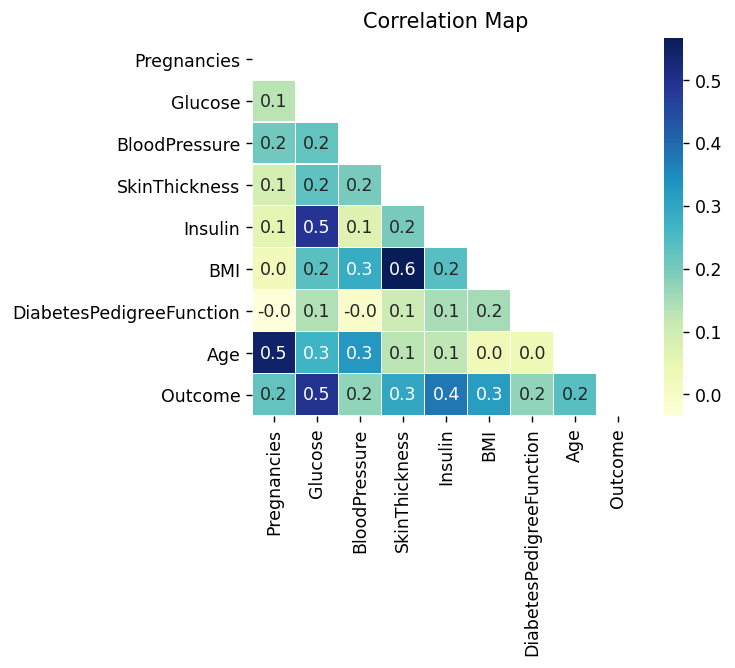

In [32]:
plt.figure(dpi = 125,figsize= (5,4))
mask = np.triu(df_nan.corr())
sns.heatmap(df_nan.corr(),mask = mask, fmt = ".1f",annot=True,lw=0.1,cmap = 'YlGnBu')
plt.title('Correlation Map')
plt.show()

In [33]:
df_nan.shape

(768, 9)

In [34]:
df.shape

(768, 9)

In [35]:
df = df_nan.copy()

In [36]:
column_list = list(df.columns)

In [37]:
column_list

['Pregnancies',
 'Glucose',
 'BloodPressure',
 'SkinThickness',
 'Insulin',
 'BMI',
 'DiabetesPedigreeFunction',
 'Age',
 'Outcome']

In [38]:
df.shape

(768, 9)

C:\Users\PC\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


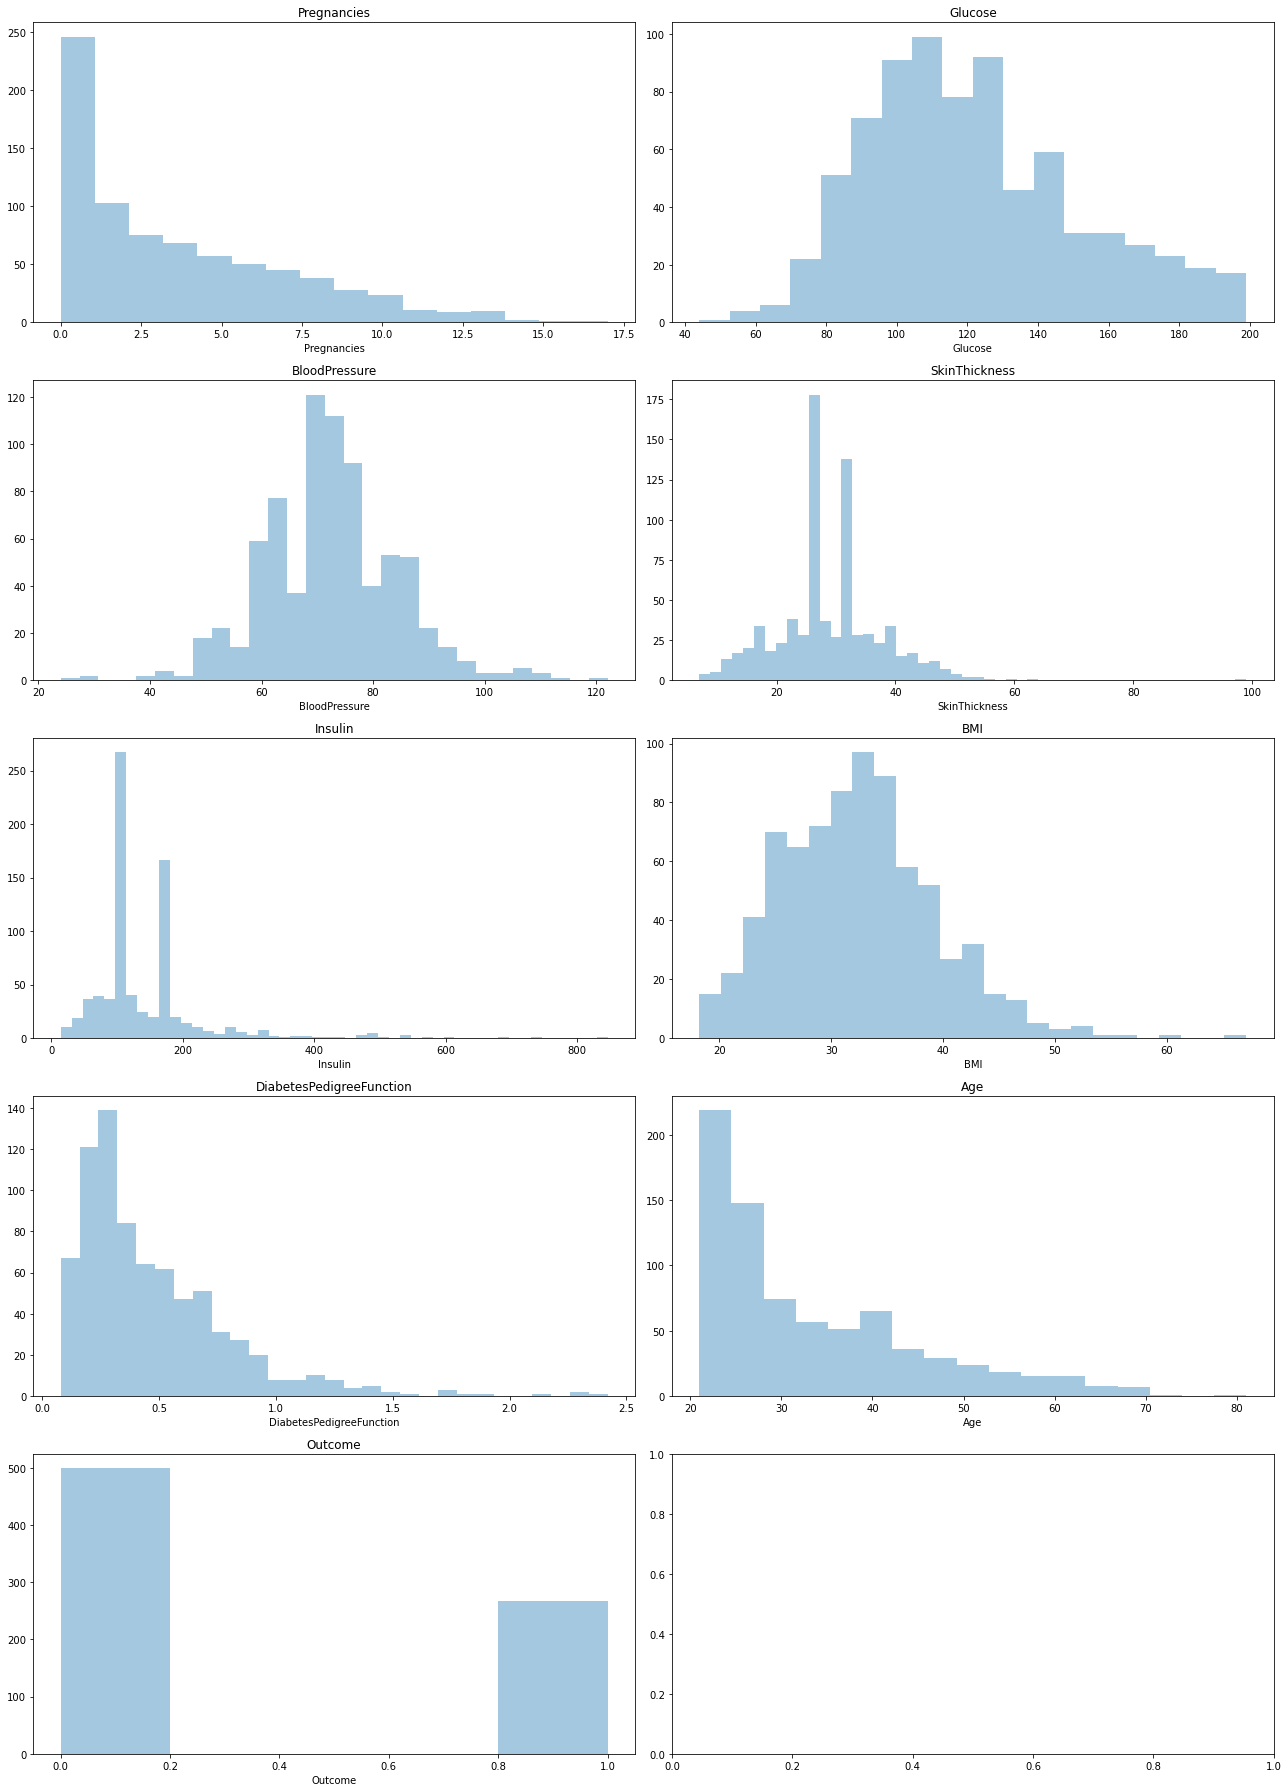

In [39]:
fig, ax = plt.subplots(ncols=2, nrows=5, figsize=(18, 25))

for i, subplot in zip(range(9), ax.flatten()):
    
    sns.distplot(df[column_list[i]], hist=True, ax=subplot, norm_hist = False, kde = False)
    subplot.title.set_text(column_list[i])
    plt.tight_layout()
    
plt.show()

C:\Users\PC\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


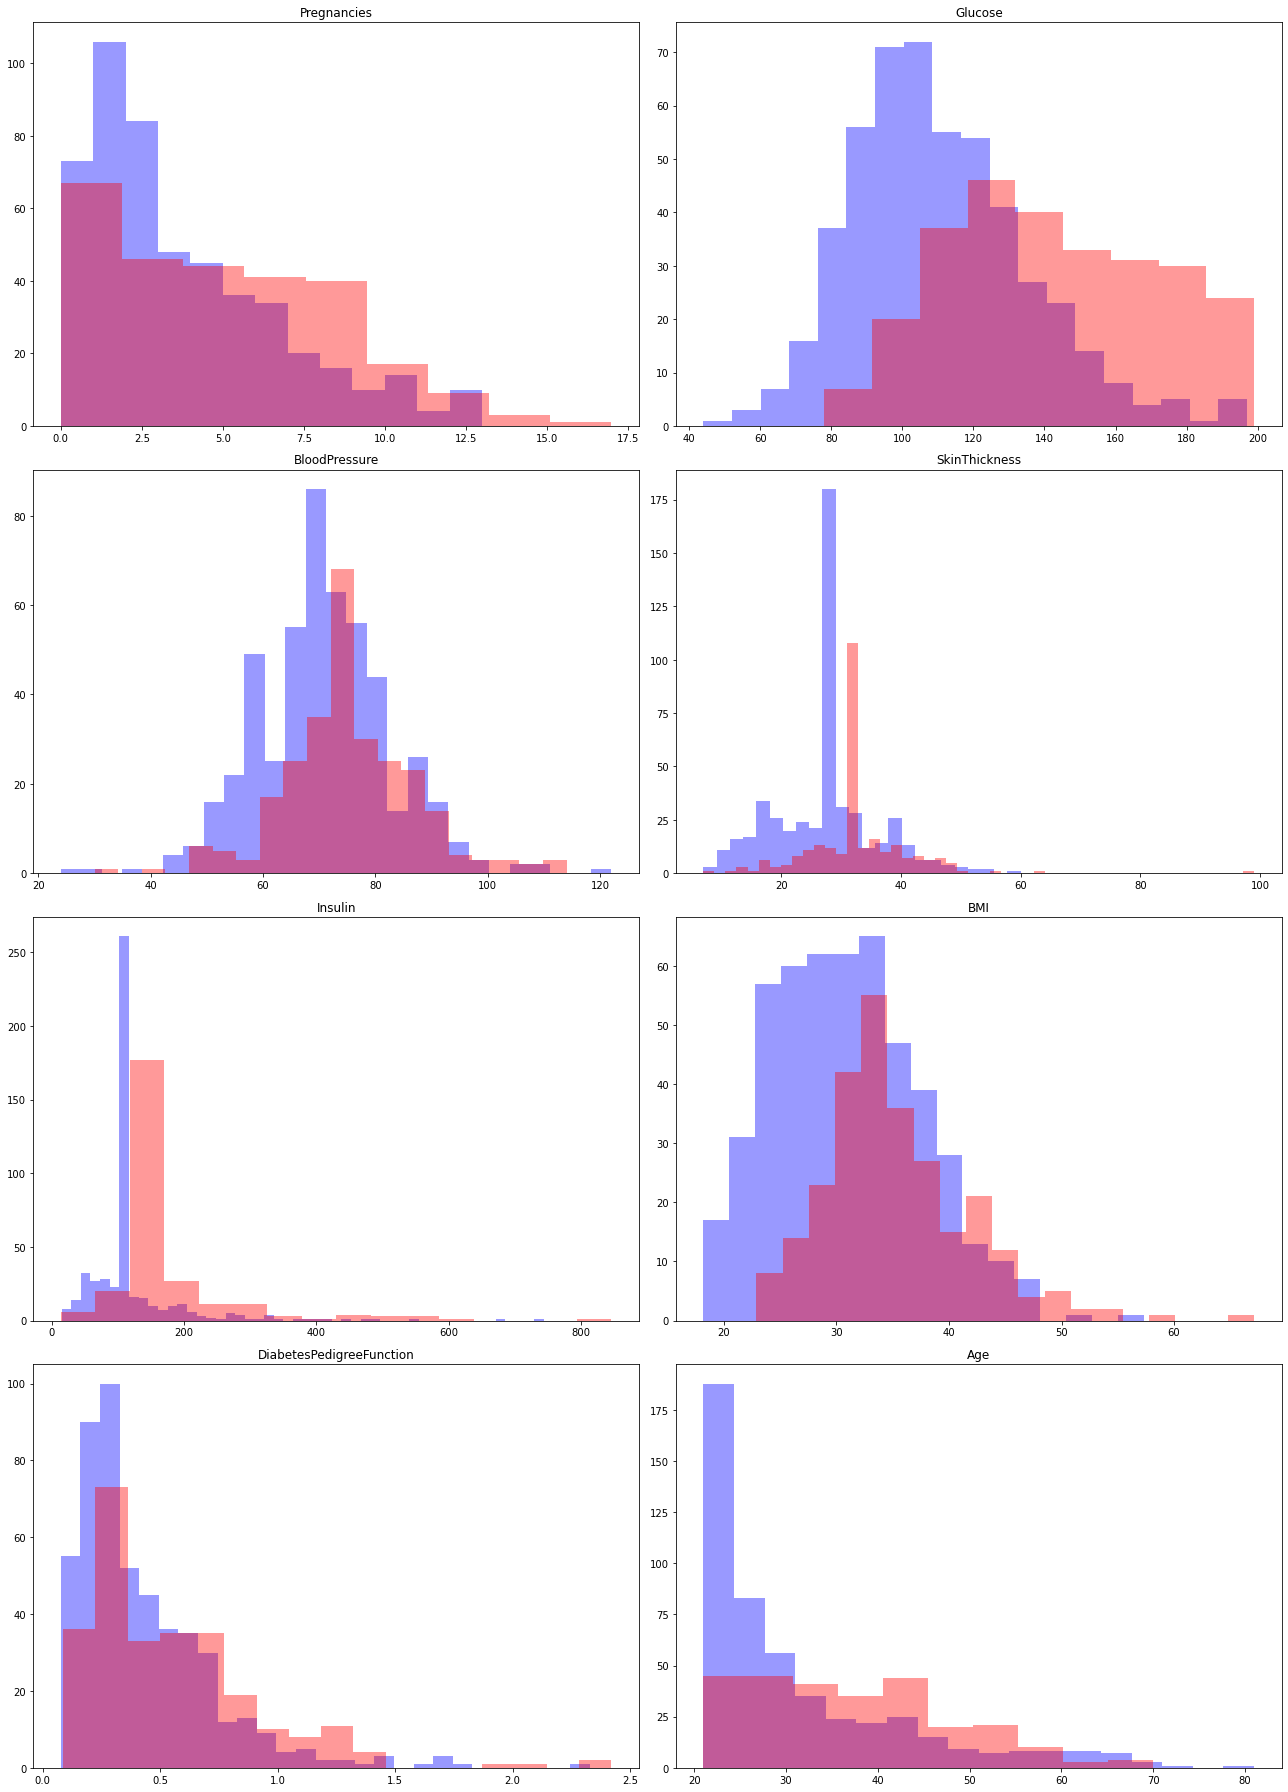

In [40]:
fig, ax = plt.subplots(ncols=2, nrows=4, figsize=(18, 25))

target_0 = df.loc[df['Outcome'] == 0]
target_1 = df.loc[df['Outcome'] == 1]

for i, subplot in zip(range(8), ax.flatten()):
    
    sns.distplot(target_0[[column_list[i]]], hist=True, color = 'blue', ax=subplot, norm_hist = False, kde = False)
    sns.distplot(target_1[[column_list[i]]], hist=True, color = 'red', ax=subplot, norm_hist = False, kde = False)
    subplot.title.set_text(column_list[i])
    plt.tight_layout()

plt.show()

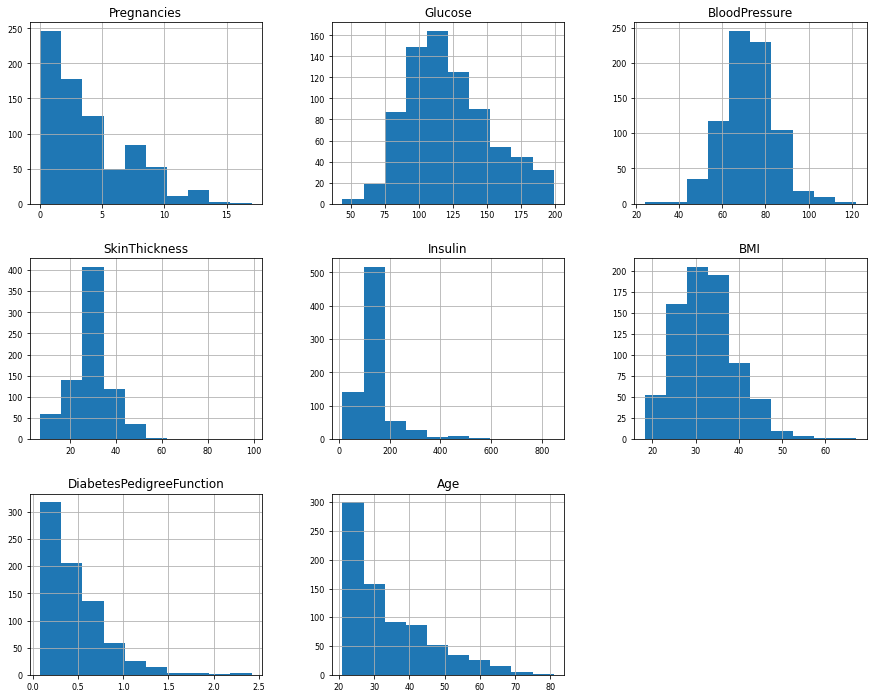

In [41]:
#visualizing numeric data

df[['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']].hist(figsize=(15, 12), bins=10, xlabelsize=8, ylabelsize=8);

In [42]:
df.shape

(768, 9)

In [43]:
df.head(2)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,169.5,33.6,0.627,50,1
1,1,85.0,66.0,29.0,102.5,26.6,0.351,31,0


Text(0, 0.5, 'No of Pregnancies')

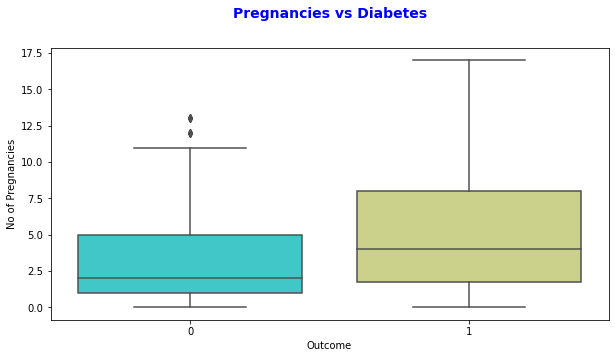

In [44]:
plt.figure(figsize=(10, 5))
ax = sns.boxplot(x="Outcome", y="Pregnancies",data=df,palette='rainbow')
ax.set_xticklabels(ax.get_xticklabels(),rotation=0)
ax.text(x=0.5, y=1.1, s='Pregnancies vs Diabetes', fontsize=14, weight='bold', ha='center', va='bottom',color = 'b', transform=ax.transAxes)
  #ax.text(x=0.5, y=1.05, s='', fontsize=10, alpha=0.75,weight='bold', ha='center', va='bottom',color = 'green', transform=ax.transAxes)
ax.set_xlabel('Outcome', fontsize = 10)
ax.set_ylabel('No of Pregnancies', fontsize = 10)

Text(0, 0.5, 'Glucose Amount')

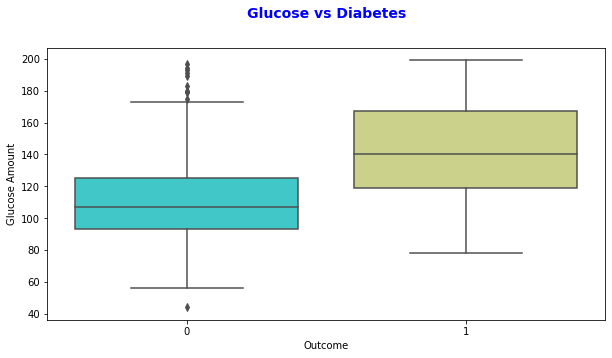

In [45]:
plt.figure(figsize=(10, 5))
ax = sns.boxplot(x="Outcome", y="Glucose",data=df,palette='rainbow')
ax.set_xticklabels(ax.get_xticklabels(),rotation=0)
ax.text(x=0.5, y=1.1, s='Glucose vs Diabetes', fontsize=14, weight='bold', ha='center', va='bottom',color = 'b', transform=ax.transAxes)
  #ax.text(x=0.5, y=1.05, s='', fontsize=10, alpha=0.75,weight='bold', ha='center', va='bottom',color = 'green', transform=ax.transAxes)
ax.set_xlabel('Outcome', fontsize = 10)
ax.set_ylabel('Glucose Amount', fontsize = 10)

Text(0, 0.5, 'BloodPressure')

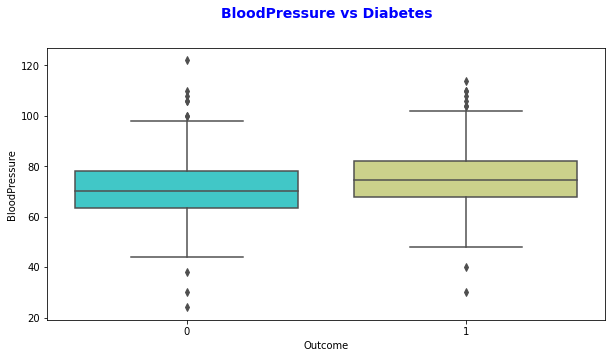

In [46]:
plt.figure(figsize=(10, 5))
ax = sns.boxplot(x="Outcome", y="BloodPressure",data=df,palette='rainbow')
ax.set_xticklabels(ax.get_xticklabels(),rotation=0)
ax.text(x=0.5, y=1.1, s='BloodPressure vs Diabetes', fontsize=14, weight='bold', ha='center', va='bottom',color = 'b', transform=ax.transAxes)
  #ax.text(x=0.5, y=1.05, s='', fontsize=10, alpha=0.75,weight='bold', ha='center', va='bottom',color = 'green', transform=ax.transAxes)
ax.set_xlabel('Outcome', fontsize = 10)
ax.set_ylabel('BloodPressure', fontsize = 10)

Text(0, 0.5, 'SkinThickness')

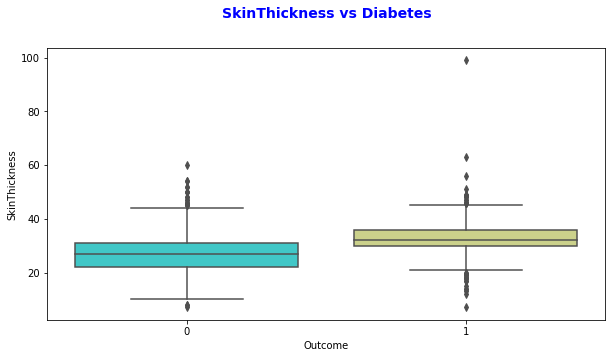

In [47]:
plt.figure(figsize=(10, 5))
ax = sns.boxplot(x="Outcome", y="SkinThickness",data=df,palette='rainbow')
ax.set_xticklabels(ax.get_xticklabels(),rotation=0)
ax.text(x=0.5, y=1.1, s='SkinThickness vs Diabetes', fontsize=14, weight='bold', ha='center', va='bottom',color = 'b', transform=ax.transAxes)
  #ax.text(x=0.5, y=1.05, s='', fontsize=10, alpha=0.75,weight='bold', ha='center', va='bottom',color = 'green', transform=ax.transAxes)
ax.set_xlabel('Outcome', fontsize = 10)
ax.set_ylabel('SkinThickness', fontsize = 10)

Text(0, 0.5, 'Insulin')

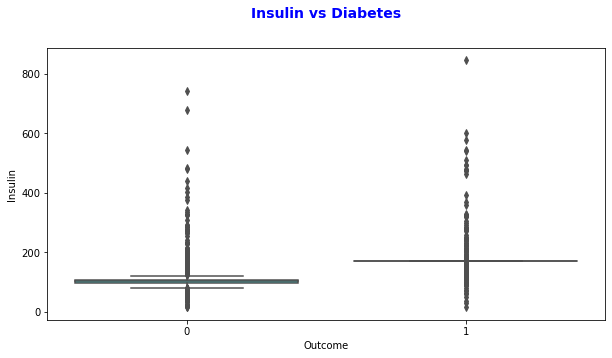

In [48]:
plt.figure(figsize=(10, 5))
ax = sns.boxplot(x="Outcome", y="Insulin",data=df,palette='rainbow')
ax.set_xticklabels(ax.get_xticklabels(),rotation=0)
ax.text(x=0.5, y=1.1, s='Insulin vs Diabetes', fontsize=14, weight='bold', ha='center', va='bottom',color = 'b', transform=ax.transAxes)
  #ax.text(x=0.5, y=1.05, s='', fontsize=10, alpha=0.75,weight='bold', ha='center', va='bottom',color = 'green', transform=ax.transAxes)
ax.set_xlabel('Outcome', fontsize = 10)
ax.set_ylabel('Insulin', fontsize = 10)

Text(0, 0.5, 'BMI')

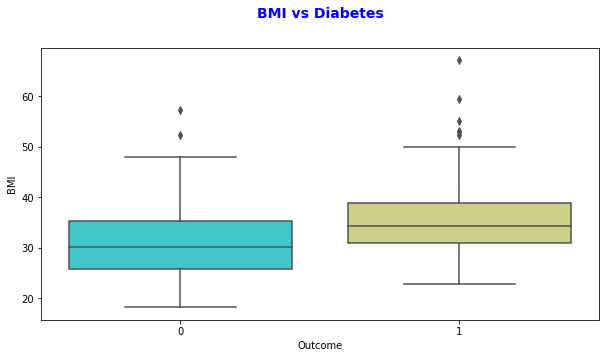

In [49]:
plt.figure(figsize=(10, 5))
ax = sns.boxplot(x="Outcome", y="BMI",data=df,palette='rainbow')
ax.set_xticklabels(ax.get_xticklabels(),rotation=0)
ax.text(x=0.5, y=1.1, s='BMI vs Diabetes', fontsize=14, weight='bold', ha='center', va='bottom',color = 'b', transform=ax.transAxes)
  #ax.text(x=0.5, y=1.05, s='', fontsize=10, alpha=0.75,weight='bold', ha='center', va='bottom',color = 'green', transform=ax.transAxes)
ax.set_xlabel('Outcome', fontsize = 10)
ax.set_ylabel('BMI', fontsize = 10)

Text(0, 0.5, 'DiabetesPedigreeFunction')

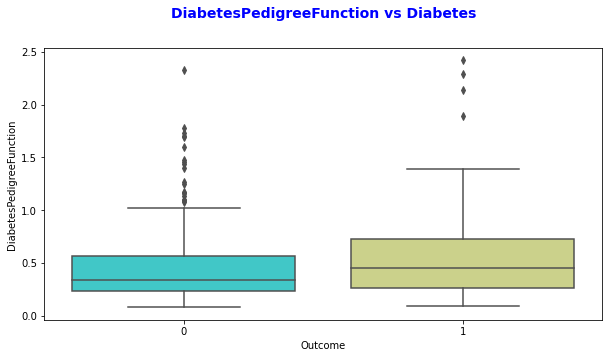

In [50]:
plt.figure(figsize=(10, 5))
ax = sns.boxplot(x="Outcome", y="DiabetesPedigreeFunction",data=df,palette='rainbow')
ax.set_xticklabels(ax.get_xticklabels(),rotation=0)
ax.text(x=0.5, y=1.1, s='DiabetesPedigreeFunction vs Diabetes', fontsize=14, weight='bold', ha='center', va='bottom',color = 'b', transform=ax.transAxes)
  #ax.text(x=0.5, y=1.05, s='', fontsize=10, alpha=0.75,weight='bold', ha='center', va='bottom',color = 'green', transform=ax.transAxes)
ax.set_xlabel('Outcome', fontsize = 10)
ax.set_ylabel('DiabetesPedigreeFunction', fontsize = 10)

Text(0, 0.5, 'Age')

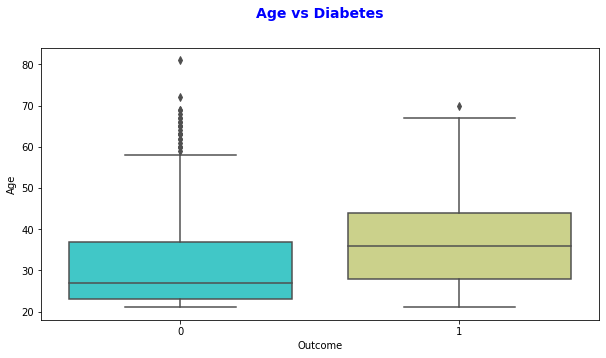

In [51]:
plt.figure(figsize=(10, 5))
ax = sns.boxplot(x="Outcome", y="Age",data=df,palette='rainbow')
ax.set_xticklabels(ax.get_xticklabels(),rotation=0)
ax.text(x=0.5, y=1.1, s='Age vs Diabetes', fontsize=14, weight='bold', ha='center', va='bottom',color = 'b', transform=ax.transAxes)
  #ax.text(x=0.5, y=1.05, s='', fontsize=10, alpha=0.75,weight='bold', ha='center', va='bottom',color = 'green', transform=ax.transAxes)
ax.set_xlabel('Outcome', fontsize = 10)
ax.set_ylabel('Age', fontsize = 10)

In [52]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from sklearn.metrics import roc_curve
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import f1_score, make_scorer
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE
from sklearn.metrics import fbeta_score, make_scorer, precision_score, recall_score, confusion_matrix, accuracy_score

In [53]:
pca_x = df.copy()
pca_x = pca_x.drop(columns = "Outcome")

In [54]:
scaler = StandardScaler()
pca_x = pd.DataFrame(scaler.fit_transform(pca_x))

In [55]:
pca_x

,0,1,2,3,4,5,6,7
0,0.639947,0.864625,-0.032180,0.665181,0.311604,0.169483,0.468492,1.425995
1,-0.844885,-1.204727,-0.528124,-0.010112,-0.440843,-0.848549,-0.365061,-0.190672
2,1.233880,2.014265,-0.693438,0.327535,0.311604,-1.328478,0.604397,-0.105584
3,-0.844885,-1.073339,-0.528124,-0.685405,-0.536303,-0.630399,-0.920763,-1.041549
4,-1.141852,0.503310,-2.677212,0.665181,0.294758,1.551096,5.484909,-0.020496
...,...,...,...,...,...,...,...,...
763,1.827813,-0.679177,0.298449,2.128317,0.429525,0.067679,-0.908682,2.532136
764,-0.547919,0.010607,-0.197495,-0.235210,-0.440843,0.634868,-0.398282,-0.531023
765,0.342981,-0.022240,-0.032180,-0.685405,-0.334153,-0.906722,-0.685193,-0.275760
766,-0.844885,0.141994,-1.024067,0.327535,0.311604,-0.339533,-0.371101,1.170732


In [57]:
pca_x.head()

,0,1,2,3,4,5,6,7
0,0.639947,0.864625,-0.032180,0.665181,0.311604,0.169483,0.468492,1.425995
1,-0.844885,-1.204727,-0.528124,-0.010112,-0.440843,-0.848549,-0.365061,-0.190672
2,1.233880,2.014265,-0.693438,0.327535,0.311604,-1.328478,0.604397,-0.105584
3,-0.844885,-1.073339,-0.528124,-0.685405,-0.536303,-0.630399,-0.920763,-1.041549
4,-1.141852,0.503310,-2.677212,0.665181,0.294758,1.551096,5.484909,-0.020496


In [58]:
pca_df = pd.DataFrame(df['Outcome'])

In [59]:
#visualizing using PCA

pca = PCA(n_components=2)
pca_result = pca.fit_transform(pca_x)
pca_df['pca-one'] = pca_result[:,0]
pca_df['pca-two'] = pca_result[:,1]

In [60]:
pca_df

,Outcome,pca-one,pca-two
0,1,1.575769,-0.613465
1,0,-1.575930,0.079637
2,1,0.734548,-0.543459
3,0,-2.131111,0.267265
4,1,0.804709,3.506736
...,...,...,...
763,0,2.129022,-2.017483
764,0,-0.469797,0.607274
765,0,-0.894597,-0.837066
766,1,-0.070977,-0.004374


In [61]:
pca_df.columns = ['Diabetic outcome','pca-one', 'pca-two']
print('Explained variation per principal component: {}'.format(pca.explained_variance_ratio_))

Explained variation per principal component: [0.29817668 0.18752573]


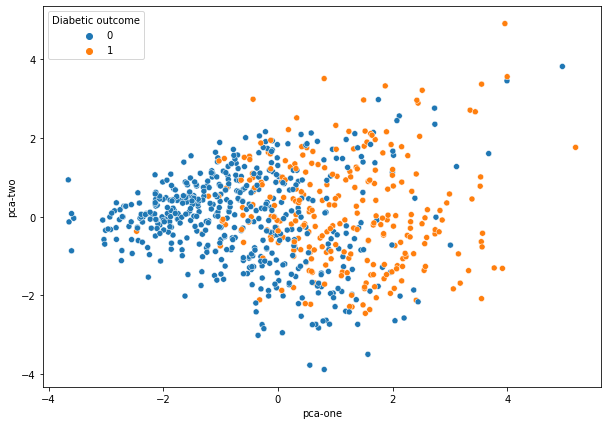

In [62]:
plt.figure(figsize=(10,7))
ax = sns.scatterplot(x="pca-one", y="pca-two",hue='Diabetic outcome', data=pca_df)

In [63]:
df_tsne = df.copy()

In [64]:
df_tsne.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,169.5,33.6,0.627,50,1
1,1,85.0,66.0,29.0,102.5,26.6,0.351,31,0
2,8,183.0,64.0,32.0,169.5,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1


In [65]:
y = df_tsne['Outcome']
df_tsne = df_tsne.drop(columns = 'Outcome')

In [66]:
df_tsne.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148.0,72.0,35.0,169.5,33.6,0.627,50
1,1,85.0,66.0,29.0,102.5,26.6,0.351,31
2,8,183.0,64.0,32.0,169.5,23.3,0.672,32
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33


In [67]:
from sklearn.manifold import TSNE
model = TSNE(learning_rate=50)
tsne_features = model.fit_transform(df_tsne)

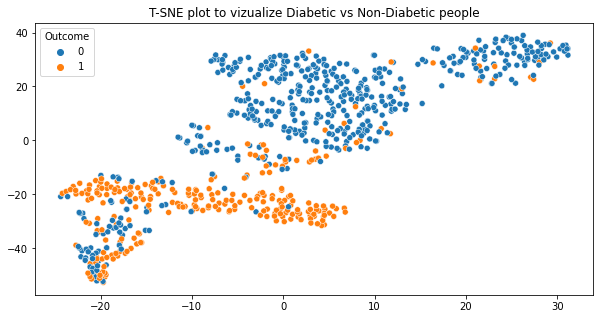

In [68]:
plt.figure(figsize=(10, 5))
plt.title('T-SNE plot to vizualize Diabetic vs Non-Diabetic people')
sns.scatterplot(x = tsne_features[:,0], y = tsne_features[:,1], hue = y)
plt.show()

In [69]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,169.5,33.6,0.627,50,1
1,1,85.0,66.0,29.0,102.5,26.6,0.351,31,0
2,8,183.0,64.0,32.0,169.5,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1


In [70]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [71]:
data = df.copy()

In [72]:
Y = data.Outcome
X = data.drop("Outcome", axis = 1)

In [73]:
columns = X.columns

In [74]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.20, random_state = 20, stratify=Y)

In [75]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
std = scaler.fit(X_train)

#save
import pickle
pickle.dump(std, open('std.pkl','wb'))


X_train = std.transform(X_train)
X_test = std.transform(X_test)
X_train = pd.DataFrame(X_train, columns = columns)
X_test = pd.DataFrame(X_test, columns = columns)
X_train.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,-0.531978,-0.706880,-0.186385,2.489469,-0.956673,1.157236,0.631014,-0.693698
1,0.057083,-0.113681,-0.186385,-0.237913,-0.454062,1.742852,1.334750,-0.608986
2,1.824269,-0.673925,0.318498,2.053088,0.402033,0.044565,-0.937667,2.525347
3,-0.826509,-0.838703,-0.691267,-0.237913,-0.625281,0.088486,-0.571848,-1.032545
4,1.235207,-0.871658,-0.018090,-0.237913,-0.454062,0.615541,0.035783,2.017077


In [76]:
X_test

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,-1.121040,-0.245503,0.655087,0.525754,1.561903,1.698931,-0.950067,-0.524274
1,-0.531978,-0.311414,1.159969,1.398516,0.181105,0.849787,-0.705155,-0.439563
2,0.057083,0.018142,-0.354679,-0.237913,-0.454062,0.352014,-0.246331,-0.354851
3,-0.826509,-0.805747,-0.186385,-1.547056,-0.454062,-2.107575,-1.012071,-1.032545
4,1.824269,1.336364,0.991675,-0.237913,-0.454062,-0.716736,-0.903565,1.762942
...,...,...,...,...,...,...,...,...
149,0.351614,0.347697,0.655087,-0.237913,-0.454062,-0.848500,-0.891164,3.033618
150,0.940676,-0.080725,-0.186385,-0.237913,-0.454062,-1.082746,-0.819861,0.322843
151,0.351614,-1.102347,-0.522973,-0.892485,-1.332250,-1.199869,-0.407540,-0.270139
152,-0.237448,0.215875,-0.018090,-0.456104,0.512497,-0.028637,0.234193,-0.524274


In [77]:
#Building Logistic Regression model on the Standardized variables

from sklearn.linear_model import LogisticRegression
lr_std = LogisticRegression(random_state = 20,penalty='l2')
lr_std.fit(X_train, y_train)
y_pred = lr_std.predict(X_test)
print('Accuracy of logistic regression on test set with standardized features: {:.2f}'.format(lr_std.score(X_test, y_test)))

Accuracy of logistic regression on test set with standardized features: 0.83


In [78]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.20, random_state = 20, stratify=Y)

In [79]:
from sklearn.preprocessing import MinMaxScaler
norm = MinMaxScaler()
norm = norm.fit(X_train)
X_train = norm.transform(X_train)
X_test = norm.transform(X_test)
X_train = pd.DataFrame(X_train, columns = columns)
X_test = pd.DataFrame(X_test, columns = columns)
X_train.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.117647,0.361290,0.469388,0.489130,0.051683,0.456033,0.255764,0.066667
1,0.235294,0.477419,0.469388,0.217391,0.106370,0.537832,0.352690,0.083333
2,0.588235,0.367742,0.530612,0.445652,0.199519,0.300613,0.039710,0.700000
3,0.058824,0.335484,0.408163,0.217391,0.087740,0.306748,0.090094,0.000000
4,0.470588,0.329032,0.489796,0.217391,0.106370,0.380368,0.173783,0.600000


In [80]:
X_test.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.000000,0.451613,0.571429,0.293478,0.325721,0.531697,0.038002,0.100000
1,0.117647,0.438710,0.632653,0.380435,0.175481,0.413088,0.071734,0.116667
2,0.235294,0.503226,0.448980,0.217391,0.106370,0.343558,0.134927,0.133333
3,0.058824,0.341935,0.469388,0.086957,0.106370,0.000000,0.029462,0.000000
4,0.588235,0.761290,0.612245,0.217391,0.106370,0.194274,0.044406,0.550000


In [81]:
#Building Logistic Regression model on the Standardized variables

from sklearn.linear_model import LogisticRegression
lr_std = LogisticRegression(random_state = 20,penalty='l2')
lr_std.fit(X_train, y_train)
y_pred = lr_std.predict(X_test)
print('Accuracy of logistic regression on test set with normalized features: {:.2f}'.format(lr_std.score(X_test, y_test)))

Accuracy of logistic regression on test set with normalized features: 0.82


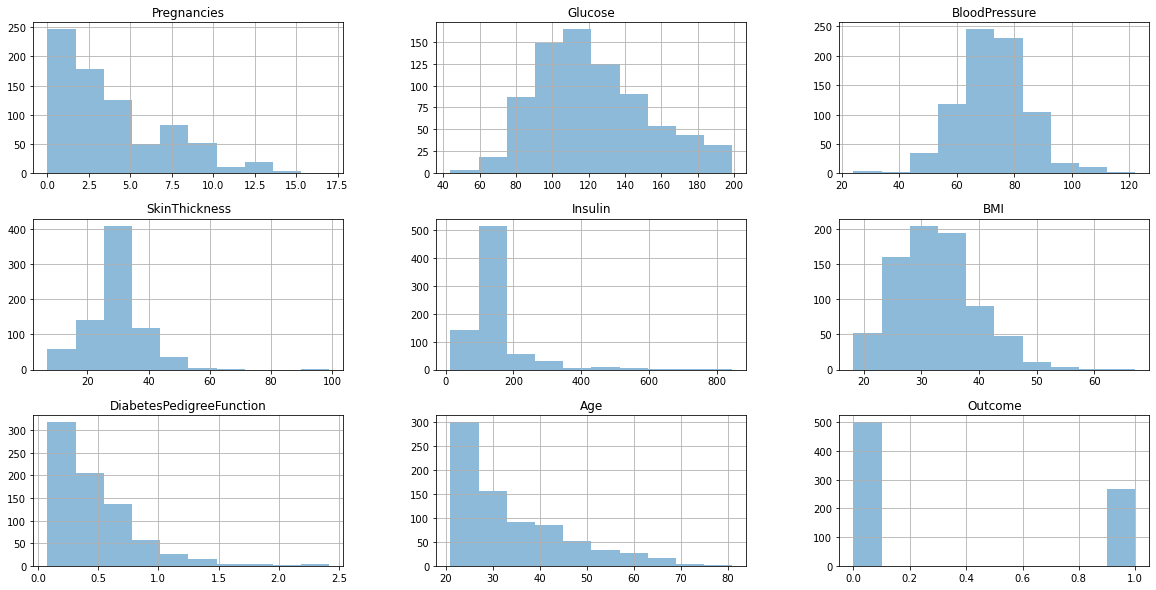

In [82]:
# Plotting the histograms of each variable
from matplotlib import pyplot
data.hist(alpha=0.5, figsize=(20, 10))
pyplot.show()

In [83]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.20, random_state = 20, stratify=Y)

In [84]:
type(X_train)

pandas.core.frame.DataFrame

In [85]:
X_train_std = X_train[['BMI','BloodPressure', 'Glucose']]
X_test_std = X_test[['BMI','BloodPressure', 'Glucose']]

In [86]:
X_train_norm = X_train[['Age','DiabetesPedigreeFunction','Insulin','Pregnancies','SkinThickness']]
X_test_norm = X_test[['Age','DiabetesPedigreeFunction','Insulin','Pregnancies','SkinThickness']]

In [87]:
X_train_std.head()

,BMI,BloodPressure,Glucose
275,40.5,70.0,100.0
699,44.5,70.0,118.0
763,32.9,76.0,101.0
208,33.2,64.0,96.0
344,36.8,72.0,95.0


In [88]:
colums_std = ['BMI','BloodPressure', 'Glucose']
columns_norm = ['Age','DiabetesPedigreeFunction','Insulin','Pregnancies','SkinThickness']

In [89]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
std = scaler.fit(X_train_std)
X_train_std = std.transform(X_train_std)
X_test_std = std.transform(X_test_std)
X_train_std = pd.DataFrame(X_train_std, columns = colums_std)
X_test_std = pd.DataFrame(X_test_std, columns = colums_std)
X_train_std.head()

,BMI,BloodPressure,Glucose
0,1.157236,-0.186385,-0.706880
1,1.742852,-0.186385,-0.113681
2,0.044565,0.318498,-0.673925
3,0.088486,-0.691267,-0.838703
4,0.615541,-0.018090,-0.871658


In [90]:
from sklearn.preprocessing import MinMaxScaler
norm = MinMaxScaler()
norm = norm.fit(X_train_norm)
X_train_norm = norm.transform(X_train_norm)
X_test_norm = norm.transform(X_test_norm)
X_train_norm = pd.DataFrame(X_train_norm, columns = columns_norm)
X_test_norm = pd.DataFrame(X_test_norm, columns = columns_norm)
X_train_norm.head()

,Age,DiabetesPedigreeFunction,Insulin,Pregnancies,SkinThickness
0,0.066667,0.255764,0.051683,0.117647,0.489130
1,0.083333,0.352690,0.106370,0.235294,0.217391
2,0.700000,0.039710,0.199519,0.588235,0.445652
3,0.000000,0.090094,0.087740,0.058824,0.217391
4,0.600000,0.173783,0.106370,0.470588,0.217391


In [91]:
X_train = pd.concat([X_train_std, X_train_norm], axis=1)
X_test = pd.concat([X_test_std, X_test_norm], axis=1)

In [92]:
X_train.head(2)

,BMI,BloodPressure,Glucose,Age,DiabetesPedigreeFunction,Insulin,Pregnancies,SkinThickness
0,1.157236,-0.186385,-0.706880,0.066667,0.255764,0.051683,0.117647,0.489130
1,1.742852,-0.186385,-0.113681,0.083333,0.352690,0.106370,0.235294,0.217391


In [93]:
X_test

,BMI,BloodPressure,Glucose,Age,DiabetesPedigreeFunction,Insulin,Pregnancies,SkinThickness
0,1.698931,0.655087,-0.245503,0.100000,0.038002,0.325721,0.000000,0.293478
1,0.849787,1.159969,-0.311414,0.116667,0.071734,0.175481,0.117647,0.380435
2,0.352014,-0.354679,0.018142,0.133333,0.134927,0.106370,0.235294,0.217391
3,-2.107575,-0.186385,-0.805747,0.000000,0.029462,0.106370,0.058824,0.086957
4,-0.716736,0.991675,1.336364,0.550000,0.044406,0.106370,0.588235,0.217391
...,...,...,...,...,...,...,...,...
149,-0.848500,0.655087,0.347697,0.800000,0.046114,0.106370,0.294118,0.217391
150,-1.082746,-0.186385,-0.080725,0.266667,0.055935,0.106370,0.411765,0.217391
151,-1.199869,-0.522973,-1.102347,0.150000,0.112724,0.010817,0.294118,0.152174
152,-0.028637,-0.018090,0.215875,0.100000,0.201110,0.211538,0.176471,0.195652


In [94]:
y_test

162    0
620    0
233    0
438    0
660    0
      ..
123    0
222    0
52     0
541    1
439    0
Name: Outcome, Length: 154, dtype: int64

In [95]:
#Building Logistic Regression model on the Standardized variables

from sklearn.linear_model import LogisticRegression
lr_std = LogisticRegression(random_state = 20,penalty='l2')
lr_std.fit(X_train, y_train)
y_pred = lr_std.predict(X_test)
print('Accuracy of logistic regression on test set with normalized features: {:.2f}'.format(lr_std.score(X_test, y_test)))

Accuracy of logistic regression on test set with normalized features: 0.82


In [96]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.20, random_state = 20, stratify=Y)

In [97]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
std = scaler.fit(X_train)
X_train = std.transform(X_train)
X_test = std.transform(X_test)
X_train = pd.DataFrame(X_train, columns = columns)
X_test = pd.DataFrame(X_test, columns = columns)
X_train.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,-0.531978,-0.706880,-0.186385,2.489469,-0.956673,1.157236,0.631014,-0.693698
1,0.057083,-0.113681,-0.186385,-0.237913,-0.454062,1.742852,1.334750,-0.608986
2,1.824269,-0.673925,0.318498,2.053088,0.402033,0.044565,-0.937667,2.525347
3,-0.826509,-0.838703,-0.691267,-0.237913,-0.625281,0.088486,-0.571848,-1.032545
4,1.235207,-0.871658,-0.018090,-0.237913,-0.454062,0.615541,0.035783,2.017077


In [98]:
#Building Logistic Regression model on the Standardized variables

from sklearn.linear_model import LogisticRegression
lr_std = LogisticRegression(random_state = 20,penalty='l2')
lr_std.fit(X_train, y_train)
y_pred = lr_std.predict(X_test)
print('Accuracy of logistic regression on test set with standardized features: {:.2f}'.format(lr_std.score(X_test, y_test)))

Accuracy of logistic regression on test set with standardized features: 0.83


In [99]:
from sklearn.neighbors import KNeighborsClassifier
test_scores = []
train_scores = []
for i in range(5,15):
    neigh = KNeighborsClassifier(n_neighbors=i)
    neigh.fit(X_train, y_train)
    train_scores.append(neigh.score(X_train,y_train))
    test_scores.append(neigh.score(X_test,y_test))

In [100]:
print('Max train_scores is ' + str(max(train_scores)*100) + ' for k = '+ 
      str(train_scores.index(max(train_scores))+5))

Max train_scores is 85.50488599348535 for k = 11


In [101]:
print('Max test_scores is ' + str(max(test_scores)*100) + ' for k = '+ 
      str(test_scores.index(max(test_scores))+5))
# K=13 has generalized well for our data.

Max test_scores is 87.01298701298701 for k = 13


In [102]:
#Support Vector Machines
from sklearn import svm
svm_model = svm.SVC(probability=True).fit(X_train, y_train)
svm_pred=svm_model.predict(X_test)
svm_model.score(X_test, y_test)
# Almost 89% Accuracy

0.8831168831168831

In [103]:
X_train.shape

(614, 8)

In [104]:
from sklearn.model_selection import GridSearchCV
clf = RandomForestClassifier(random_state = 20)

# use a full grid over all parameters
param_grid = {'n_estimators' : [50,100,150], "max_depth": [3, 5, 7],
              "max_features": [1, 3, 5, 7, 8]
              }

# run grid search
grid = GridSearchCV(clf, param_grid, cv=5,scoring='accuracy')

grid.fit(X_train, y_train)
print("Grid-Search with accuracy")
print("Best parameters:", grid.best_params_)
print("Best cross-validation score (accuracy)): {:.3f}".format(grid.best_score_))

Grid-Search with accuracy
Best parameters: {'max_depth': 7, 'max_features': 3, 'n_estimators': 100}
Best cross-validation score (accuracy)): 0.880


In [105]:
from sklearn.metrics import accuracy_score

In [106]:
rfc = RandomForestClassifier(n_estimators= 100, max_features= 3, max_depth= 7)
rfc.fit(X_train, y_train)

y_pr=rfc.predict(X_test)
print("Test set accuracy: {:.3f}".format(accuracy_score(y_test, y_pr)))

confusion_matrix(y_test, y_pr)

Test set accuracy: 0.896


array([[91,  9],
       [ 7, 47]], dtype=int64)

In [107]:
clf = GradientBoostingClassifier(random_state=20)
# use a full grid over all parameters
param_grid = {'n_estimators' : [50,100,150], "max_depth": [2,5,7,8],
              "max_features": [2,3,5, 7] ,'learning_rate' : [0.05, 0.075, 0.1, 0.25, 0.5, 0.75, 1]
              }
# run grid search
grid = GridSearchCV(clf, param_grid, cv=5,scoring='accuracy')
grid.fit(X_train, y_train)
print("Grid-Search with accuracy")
print("Best parameters:", grid.best_params_)
print("Best cross-validation score (accuracy)): {:.3f}".format(grid.best_score_))

Grid-Search with accuracy
Best parameters: {'learning_rate': 0.075, 'max_depth': 5, 'max_features': 2, 'n_estimators': 50}
Best cross-validation score (accuracy)): 0.888


In [108]:
gbc = GradientBoostingClassifier(n_estimators= 50, max_features= 2, max_depth= 5, learning_rate= 0.075)
gbc.fit(X_train, y_train)

y_pr=gbc.predict(X_test)
print("Test set accuracy: {:.3f}".format(accuracy_score(y_test, y_pr)))

confusion_matrix(y_test, y_pr)

Test set accuracy: 0.883


array([[91,  9],
       [ 9, 45]], dtype=int64)

In [109]:
import pickle
# Lets dump our SVM model
pickle.dump(svm_model, open('svm_model.pkl','wb'))